<h1>Cumulative Distribution Functions</h1>

<div style="width: 80%; padding:">
<p>
A Cumulative Distribution Function (CDF) is a mathematical function that describes the probability distribution of a random variable. It gives the probability that the random variable takes on a value less than or equal to a given value.
</p>

Cumulative distribution functions exist for both continuous and discrete variables. Continuous functions find solutions using integrals, while discrete functions sum the probabilities for all discrete values that are less than or equal to each value. Statisticians refer to discrete functions as Probability Mass Functions.

- **Definition:**
    - The CDF is a function that provides the probability that a random variable `X` takes on a value less than or equal to a specified value `x`.
- **Notation:**
    - For both discrete and continuous random variables, the CDF is denoted as `F(x)`, where `x` is a specific value.
- **Properties:**
    - The CDF has the following properties:
        1. `0 ≤ F(x) ≤ 1` for all `x`.
        2. `F(x)` is non-decreasing.
        3. The limit of `F(x)` as `x` approaches negative infinity is 0, and as `x` approaches positive infinity is 1.

Understanding these concepts is fundamental for working with probability distributions in statistics and data science.

[14.2 - Cumulative Distribution Functions | STAT 414](https://online.stat.psu.edu/stat414/lesson/14/14.2)
</div>

In [12]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

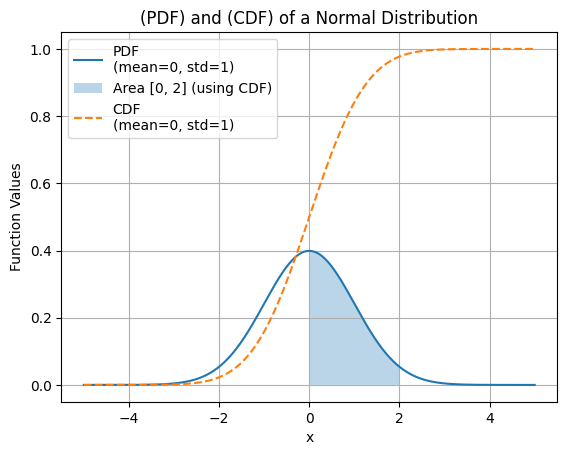

Probability that X falls within [0, 2] (using CDF): 0.4772


In [13]:
# Define parameters for the normal distribution
mu = 0    # mean
sigma = 1 # standard deviation

x = np.linspace(mu - 5 * sigma, mu + 5 * sigma, 1000)

# Calculate the PDF using norm.pdf
pdf_values = norm.pdf(x, mu, sigma)

# Calculate the CDF using norm.cdf
cdf_values = norm.cdf(x, mu, sigma)

# Plot the PDF
plt.plot(x, pdf_values, label=f'PDF\n(mean={mu}, std={sigma})')

# Shade the area under the curve between 0 and 2 using CDF
lower_bound = 0
upper_bound = 2
plt.fill_between(x, 0, pdf_values, where=(x >= lower_bound) & (x <= upper_bound), alpha=0.3, label='Area [0, 2] (using CDF)')

plt.plot(x, cdf_values, label=f'CDF\n(mean={mu}, std={sigma})', linestyle='dashed')


plt.title('(PDF) and (CDF) of a Normal Distribution')
plt.xlabel('x')
plt.ylabel('Function Values')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the probability using CDF
probability = norm.cdf(upper_bound, mu, sigma) - norm.cdf(lower_bound, mu, sigma)

print(f'Probability that X falls within [0, 2] (using CDF): {probability:.4f}')


To plot the inverse of the Cumulative Distribution Function (CDF), you can use the Percent-Point Function (PPF), 

also known as the quantile function or inverse cumulative distribution function. In SciPy, the PPF is available as norm.ppf for a normal distribution.

Here's an example of how to plot the inverse of the CDF (PPF) for a standard normal distribution:

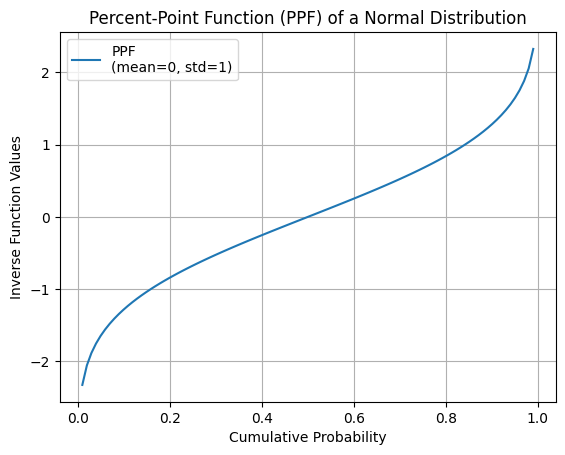

In [37]:
# Define parameters for the normal distribution
mu = 0    # mean
sigma = 1 # standard deviation

# Generate x values for plotting the PPF
x = np.linspace(0.01, 0.99, 100)  # Avoiding exactly 0 and 1 to prevent issues with the PPF

# Calculate the PPF using norm.ppf
ppf_values = norm.ppf(x, mu, sigma)

# Plot the PPF
plt.plot(x, ppf_values, label=f'PPF\n(mean={mu}, std={sigma})')

plt.title('Percent-Point Function (PPF) of a Normal Distribution')
plt.xlabel('Cumulative Probability')
plt.ylabel('Inverse Function Values')
plt.legend()
plt.grid(True)
plt.show()


In this example, the norm.ppf function is used to calculate the inverse of the CDF for a standard normal distribution. The plot shows how the PPF varies with cumulative probabilities. The x-axis represents cumulative probabilities, and the y-axis represents the corresponding values from the inverse CDF.

Keep in mind that the PPF is the inverse of the CDF, and it gives you the value at which the CDF reaches a specified probability. The cumulative probability is on the x-axis, and the corresponding value from the inverse CDF is on the y-axis.

#### Understanding Cumulative Distribution Function (CDF)

- 1. Dataset
Suppose you have a dataset of ages of college students. Each age in the dataset is a random variable $(X)$.

- 2. Cumulative Distribution Function (CDF)
The CDF of a random variable $(X)$ at a particular value $(X)$ gives the probability that $(X)$ is less than or equal to $(X)$. Mathematically, it's denoted as $(F(x))$, where:
$[ F(x) = P(X \leq x) ]$

- 3. Interpretation
Let's say you want to find $(F(20))$, the CDF at age 20. This would be the probability that a randomly chosen student's age is 20 or younger. Similarly, $(F(25))$ would give you the probability that a randomly chosen student's age is 25 or younger.

- 4. Application
The CDF is useful for understanding the distribution of the dataset. For example, if $(F(20) = 0.70)$, it means that 70% of the students in the dataset are 20 years old or younger.

- 5. Percentiles
CDF is also useful for finding percentiles. If you want to know the age below which 75% of the students fall, you find $(F^{-1}(0.75))$, where $(F^{-1})$ is the inverse of the CDF. This would give you the 75th percentile age.

In summary, the CDF provides a way to understand the cumulative probability distribution of a dataset. It's a function that, for any given value, tells you the probability that a randomly selected data point is less than or equal to that value. It's a fundamental concept in statistics for analyzing and interpreting distributions.


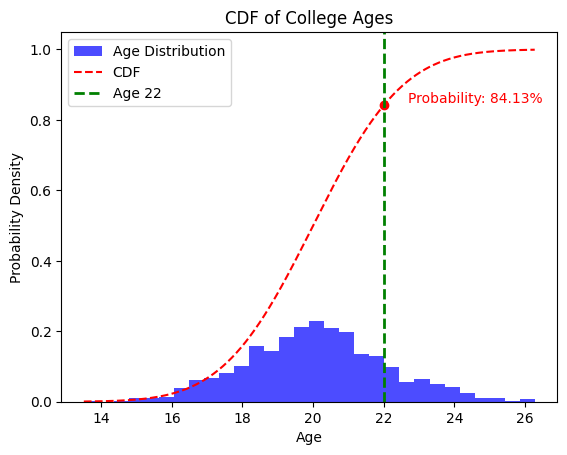

In [36]:
mu = 20
sigma = 2
sample_size = 1000
ages = np.random.normal(mu, sigma, sample_size)

# Calculate the Cumulative Distribution Function (CDF) for age 22
target_age = 22
cdf_age_22 = norm.cdf(target_age, mu, sigma)

# Plot the histogram of the dataset
plt.hist(ages, bins=30, density=True, alpha=0.7, color='blue', label='Age Distribution')

# Plot the Cumulative Distribution Function (CDF)
x_values = np.linspace(min(ages), max(ages), 1000)
cdf_values = norm.cdf(x_values, mu, sigma)
plt.plot(x_values, cdf_values, 'r--', label='CDF')

# Highlight a specific age, for example, 22
plt.axvline(target_age, color='green', linestyle='dashed', linewidth=2, label=f'Age {target_age}')

# Find the intersection point
intersection = {
  "x": target_age,
  "y": norm.cdf(target_age, mu, sigma)
}
# intersection = (target_age, norm.cdf(target_age, mu, sigma))
plt.scatter(**intersection, color='red')  # Mark the intersection point

# Add text annotation at the intersection point
plt.text(intersection["x"]+4.5, intersection["y"], s=f"Probability: {cdf_age_22:.2%}", color='red', verticalalignment='bottom', horizontalalignment='right')

# Set labels and legend
plt.title('CDF of College Ages')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.legend()

# Show the plot
plt.show()
